In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV

In [3]:
# Load the data from Excel file
df = pd.read_excel('Dmart.xlsx')

# Basic EDA

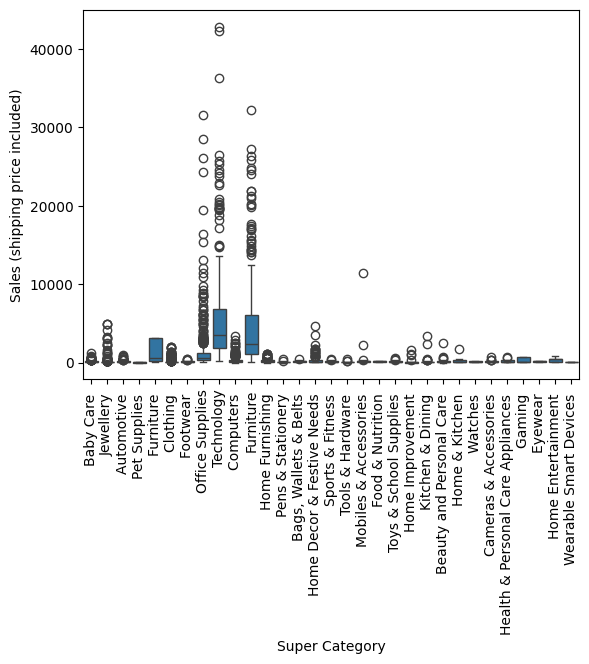

In [23]:
# Boxplot
sns.boxplot(x='Super Category', y='Sales (shipping price included)', data=df)
plt.xticks(rotation=90)
plt.show()
# plt.figure(figsize=(12, 6))
# sns.boxplot(x='Sales (shipping price included)', y='Category', data=df)
# plt.show()
# plt.figure(figsize=(12, 6))
# sns.violinplot(x='Sales (shipping price included)', y='Category', data=df)
# plt.show()
# plt.figure(figsize=(12, 6))
# sns.swarmplot(x='Sales (shipping price included)', y='Category', data=df, size=4)
# plt.show()



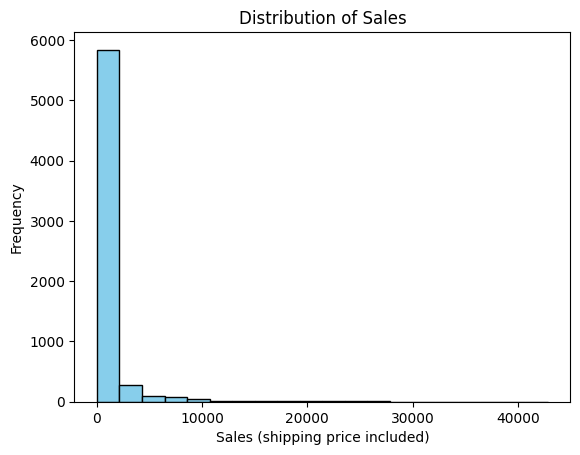

In [5]:
# b. Histogram
# Histogram
plt.hist(df['Sales (shipping price included)'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Sales (shipping price included)')
plt.ylabel('Frequency')
plt.title('Distribution of Sales')
plt.show()

In [7]:
# Aggregation for all numerical Columns
numerical_aggregation = df.describe()
numerical_aggregation

Order Date         Price   
count                           6428   6428.000000  \
mean   2017-02-26 21:16:41.369010688    876.516801   
min              2015-01-02 00:00:00      7.058824   
25%              2016-02-11 00:00:00    117.549020   
50%              2017-05-06 00:00:00    197.671640   
75%              2018-03-11 00:00:00    479.901961   
max              2018-12-12 00:00:00  40395.405400   
std                              NaN   2412.198794   

       Operational/ Production Cost  Selling Price      Discount   
count                   5028.000000    6428.000000   6428.000000  \
mean                     801.573313     795.291310     81.225491   
min                      -13.470588       3.529412      0.000000   
25%                       72.196078      78.431373     10.515000   
50%                      161.274510     137.880041     36.911765   
75%                      467.496900     367.615065     71.568627   
max                    28953.823600   40388.395400  11401.176471   
std                     2149.972447    2390.710076    247.240296   

       Shipping Cost  Sales (shipping price included)        Profit   
count    6428.000000                      6428.000000   6428.000000  \
mean       70.878435                       865.233384    137.115094   
min        -6.238900                         4.529412  -7698.942800   
25%         0.000000                        80.333333      3.000000   
50%         1.000000                       140.441176     14.000000   
75%         2.000000                       391.028056     18.000000   
max      5639.825400                     42854.863900  19747.099900   
std       293.157801                      2639.154865    696.420860   

          Quantity  
count  6428.000000  
mean      1.005445  
min       1.000000  
25%       1.000000  
50%       1.000000  
75%       1.000000  
max       6.000000  
std       0.137103

In [9]:
# Unique Values across all columns
unique_values = df.nunique()
unique_values

Order Date                          371
Order Priority                        4
Ship Type                             4
City                                294
State                                67
Country                               9
Region                                3
Segment                               3
Super Category                       31
Category                            137
Price                              3025
Operational/ Production Cost       2908
Selling Price                      2293
Discount                            870
Shipping Cost                      1349
Sales (shipping price included)    2886
Profit                             1403
Quantity                              5
dtype: int64

In [11]:
# Duplicate values across all columns
duplicate_rows = df[df.duplicated()]
duplicate_rows

Order Date Order Priority          Ship Type           City   
109  2015-02-02           High           Next Day        Yunyang  \
797  2015-06-10            Low  Standard Delivery          Delhi   
2091 2016-07-12           High           Next Day        Wuchuan   
2092 2016-07-12           High           Next Day        Wuchuan   
2095 2016-07-12       Moderate          Named Day         Foshan   
2872 2017-02-08       Moderate          Named Day           Pune   
3070 2017-04-05           High           Next Day         Xiamen   
3397 2017-06-12            Low  Standard Delivery      Changchun   
3596 2017-07-10       Moderate          Named Day         Kanpur   
3668 2017-08-05           High           Next Day        Huizhou   
4225 2017-12-08            Low  Standard Delivery      Mangalore   
5404 2018-06-11            Low  Standard Delivery         Jhansi   
6338 2018-12-11            Low  Standard Delivery  Visakhapatnam   
6339 2018-12-11            Low  Standard Delivery  Visakhapatnam   
6415 2018-12-12            Low  Standard Delivery       Hangzhou   

               State Country        Region Segment          Super Category   
109            Henan   China    North Asia  Retail              Baby Care   \
797            Delhi   India  Central Asia  Retail  Mobiles & Accessories    
2091       Guangdong   China    North Asia  Retail               Clothing    
2092       Guangdong   China    North Asia  Retail               Clothing    
2095       Guangdong   China    North Asia  Retail               Clothing    
2872     Maharashtra   India  Central Asia  Retail  Mobiles & Accessories    
3070          Fujian   China    North Asia  Retail  Mobiles & Accessories    
3397           Jilin   China    North Asia  Retail               Clothing    
3596   Uttar Pradesh   India  Central Asia  Retail  Mobiles & Accessories    
3668       Guangdong   China    North Asia  Retail  Mobiles & Accessories    
4225       Karnataka   India  Central Asia  Retail               Clothing    
5404   Uttar Pradesh   India  Central Asia  Retail               Clothing    
6338  Andhra Pradesh   India  Central Asia  Retail      Pens & Stationery    
6339  Andhra Pradesh   India  Central Asia  Retail      Pens & Stationery    
6415        Zhejiang   China    North Asia  Retail               Clothing    

                  Category       Price  Operational/ Production Cost   
109     Baby & Kids Gifts   190.196078                    123.450980  \
797    Mobile Accessories   122.352941                     81.941176   
2091       Men's Clothing   391.960784                           NaN   
2092       Men's Clothing   391.960784                           NaN   
2095       Men's Clothing   391.960784                           NaN   
2872   Tablet Accessories   361.176471                    179.980392   
3070   Tablet Accessories   361.176471                    177.980392   
3397     Women's Clothing   539.019608                           NaN   
3596   Tablet Accessories   186.078431                    112.352941   
3668   Tablet Accessories   186.078431                    114.352941   
4225       Men's Clothing   235.098039                           NaN   
5404     Women's Clothing   121.372549                           NaN   
6338      Office Supplies   122.450980                     93.941176   
6339      Office Supplies   122.450980                     93.941176   
6415     Women's Clothing   107.647059                           NaN   

      Selling Price    Discount  Shipping Cost   
109      127.450980   62.745098            0.0  \
797       97.941176   24.411765            0.0   
2091     294.019608   97.941176            1.0   
2092     294.019608   97.941176            0.0   
2095     294.019608   97.941176           -1.0   
2872     195.980392  165.196078            0.0   
3070     195.980392  165.196078            1.0   
3397     431.274510  107.745098            2.0   
3596     127.352941   58.725490           -1.0   
3668     127.3

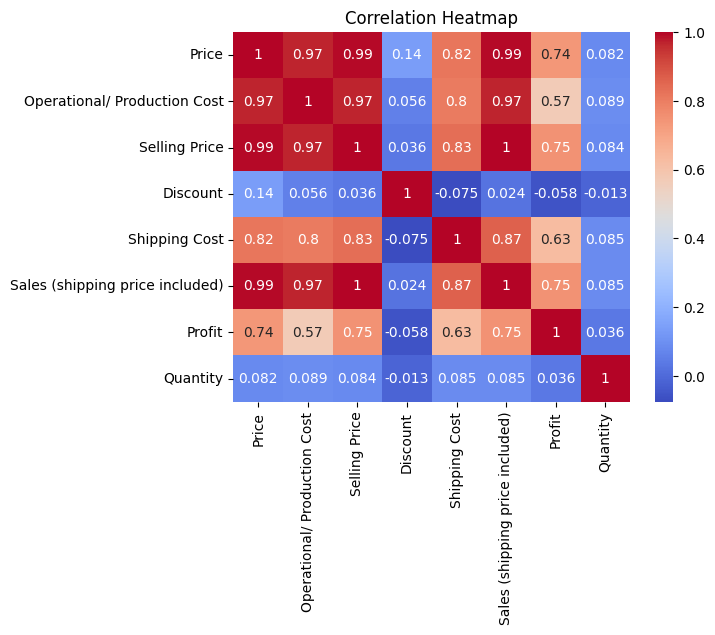

In [15]:
# Correlation Heatmap

numeric_df = df.select_dtypes(include=np.number)

correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

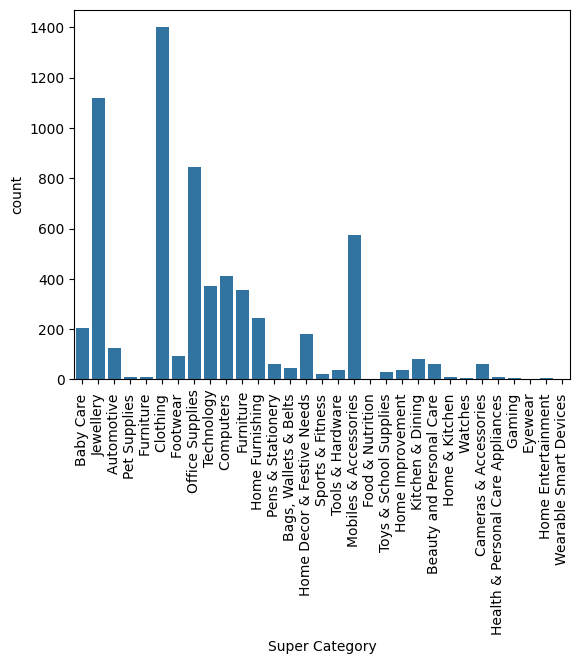

In [24]:
# Bar Plot
sns.countplot(x='Super Category', data=df)
plt.xticks(rotation = 90)
plt.show()


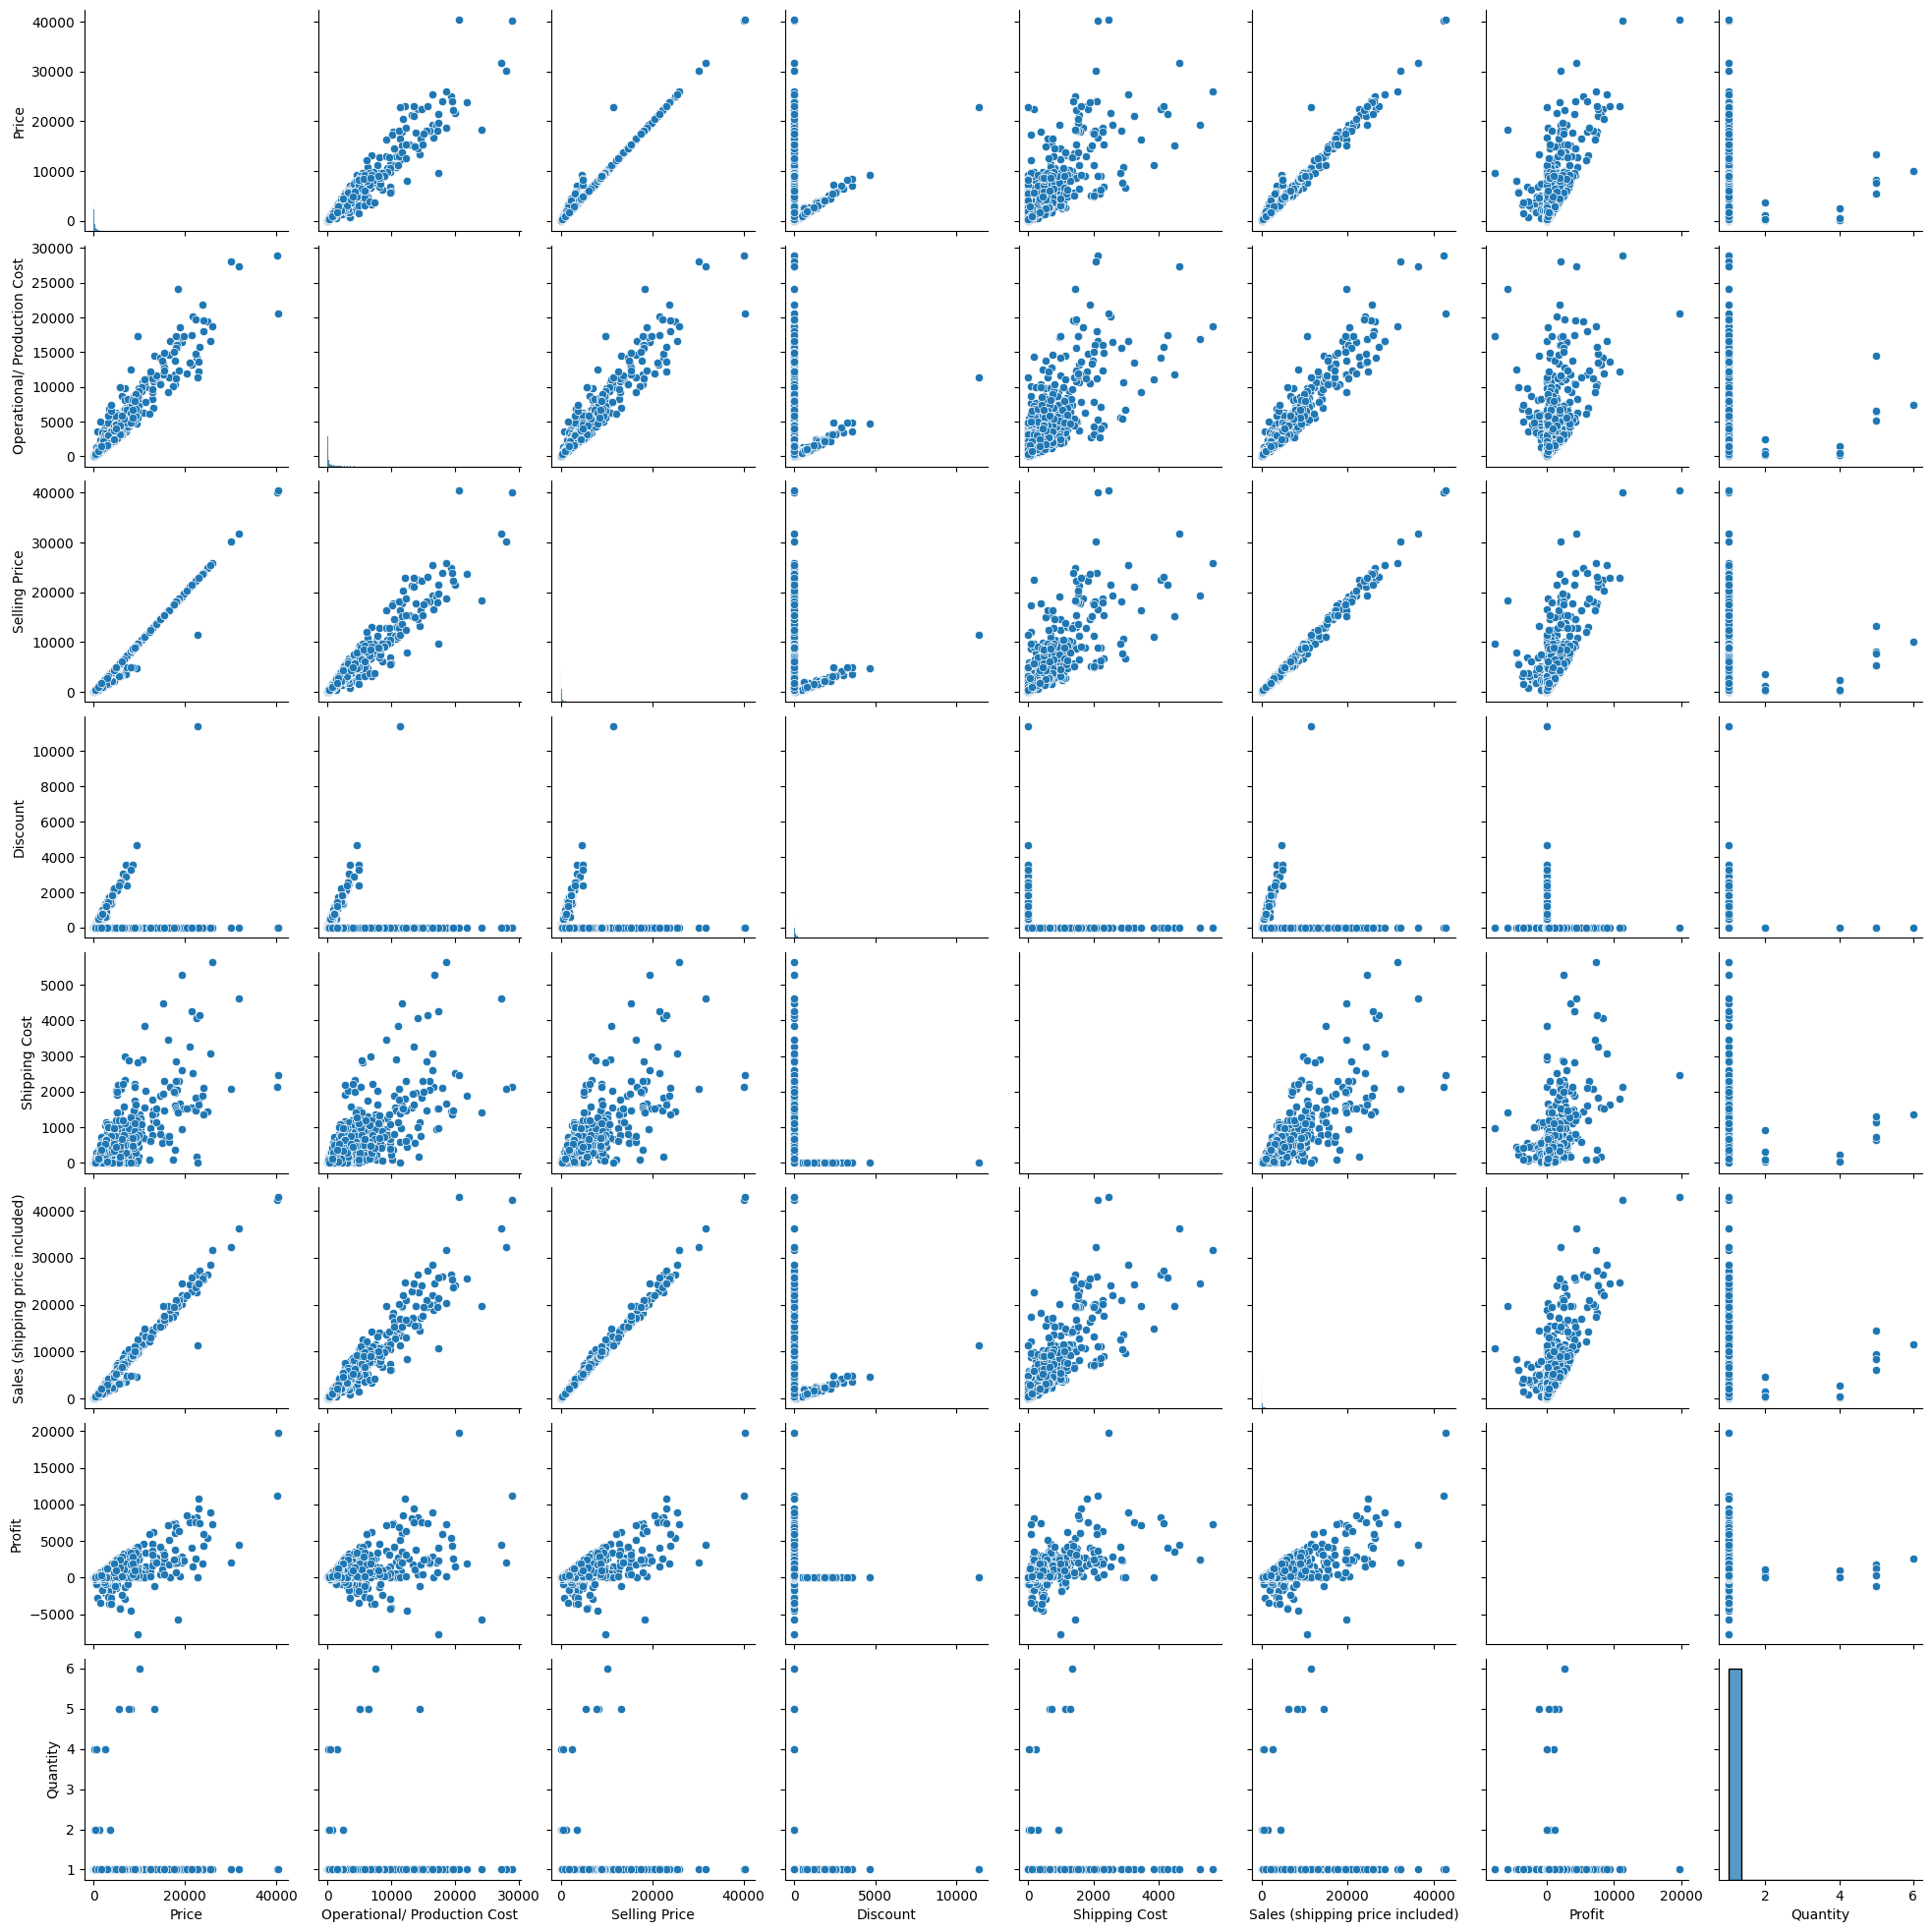

In [19]:
# Pair Plot
sns.pairplot(df)
plt.show()

# Advanced EDA

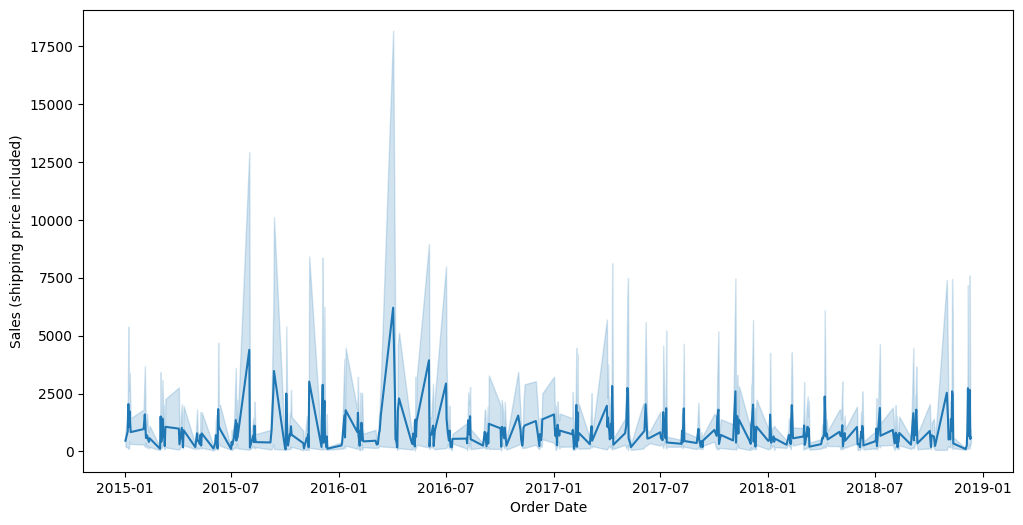

In [5]:

# # # Parallel Coordinates Plot
# # pd.plotting.parallel_coordinates(df[['Price', 'Quantity', 'Profit']], 'Profit', colormap='viridis')
# # plt.show()
# pd.plotting.parallel_coordinates(df[['Price', 'Quantity', 'Profit', 'Sales']], 'Super Category', colormap='viridis')
# plt.show()

# Convert 'Order Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

plt.figure(figsize=(12, 6))

# Time Series Visualization
sns.lineplot(x='Order Date', y='Sales (shipping price included)', data=df)
plt.show()



In [6]:
# Geospatial Analysis using seaborn
sns.scatterplot(x='Longitude', y='Latitude', hue='Sales (shipping price included)', data=df)
plt.show()


ValueError: Could not interpret value `Longitude` for `x`. An entry with this name does not appear in `data`.

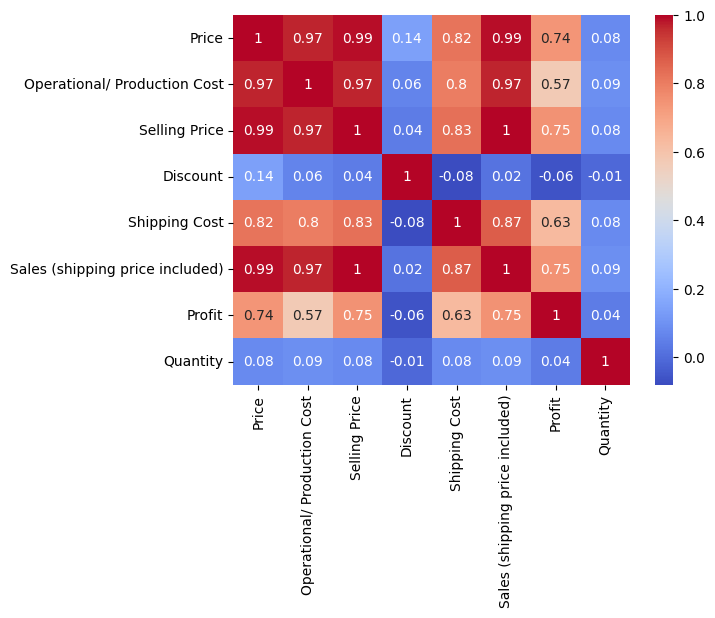

In [8]:
# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Calculate Partial Correlation Heatmap
partial_corr = numeric_df.corr(method='pearson').round(2)

# Create a heatmap
sns.heatmap(partial_corr, annot=True, cmap='coolwarm')
plt.show()



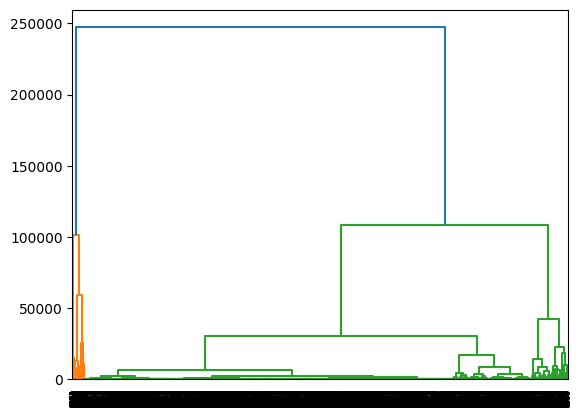

<Figure size 1200x600 with 0 Axes>

In [10]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Hierarchical Clustering
linkage_matrix = linkage(df[['Sales (shipping price included)', 'Profit']], method='ward')
dendrogram(linkage_matrix)
plt.figure(figsize=(12, 6))
plt.show()


In [13]:
# # Fit Gamma distribution to 'Sales (shipping price included)'
# sns.distplot(df['Sales (shipping price included)'], fit=stats.gamma)
# plt.show()

# Example using Plotly 
import plotly.express as px

fig = px.scatter(df, x='Sales (shipping price included)', y='Profit', color='Category', size='Quantity')
fig.show()


C:\Users\durga\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning:


The markers list has fewer values (3) than needed (137) and will cycle, which may produce an uninterpretable plot.

C:\Users\durga\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning:


The markers list has fewer values (3) than needed (137) and will cycle, which may produce an uninterpretable plot.

C:\Users\durga\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning:


The markers list has fewer values (3) than needed (137) and will cycle, which may produce an uninterpretable plot.

C:\Users\durga\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning:


The markers list has fewer values (3) than needed (137) and will cycle, which may produce an uninterpretable plot.

C:\Users\durga\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn

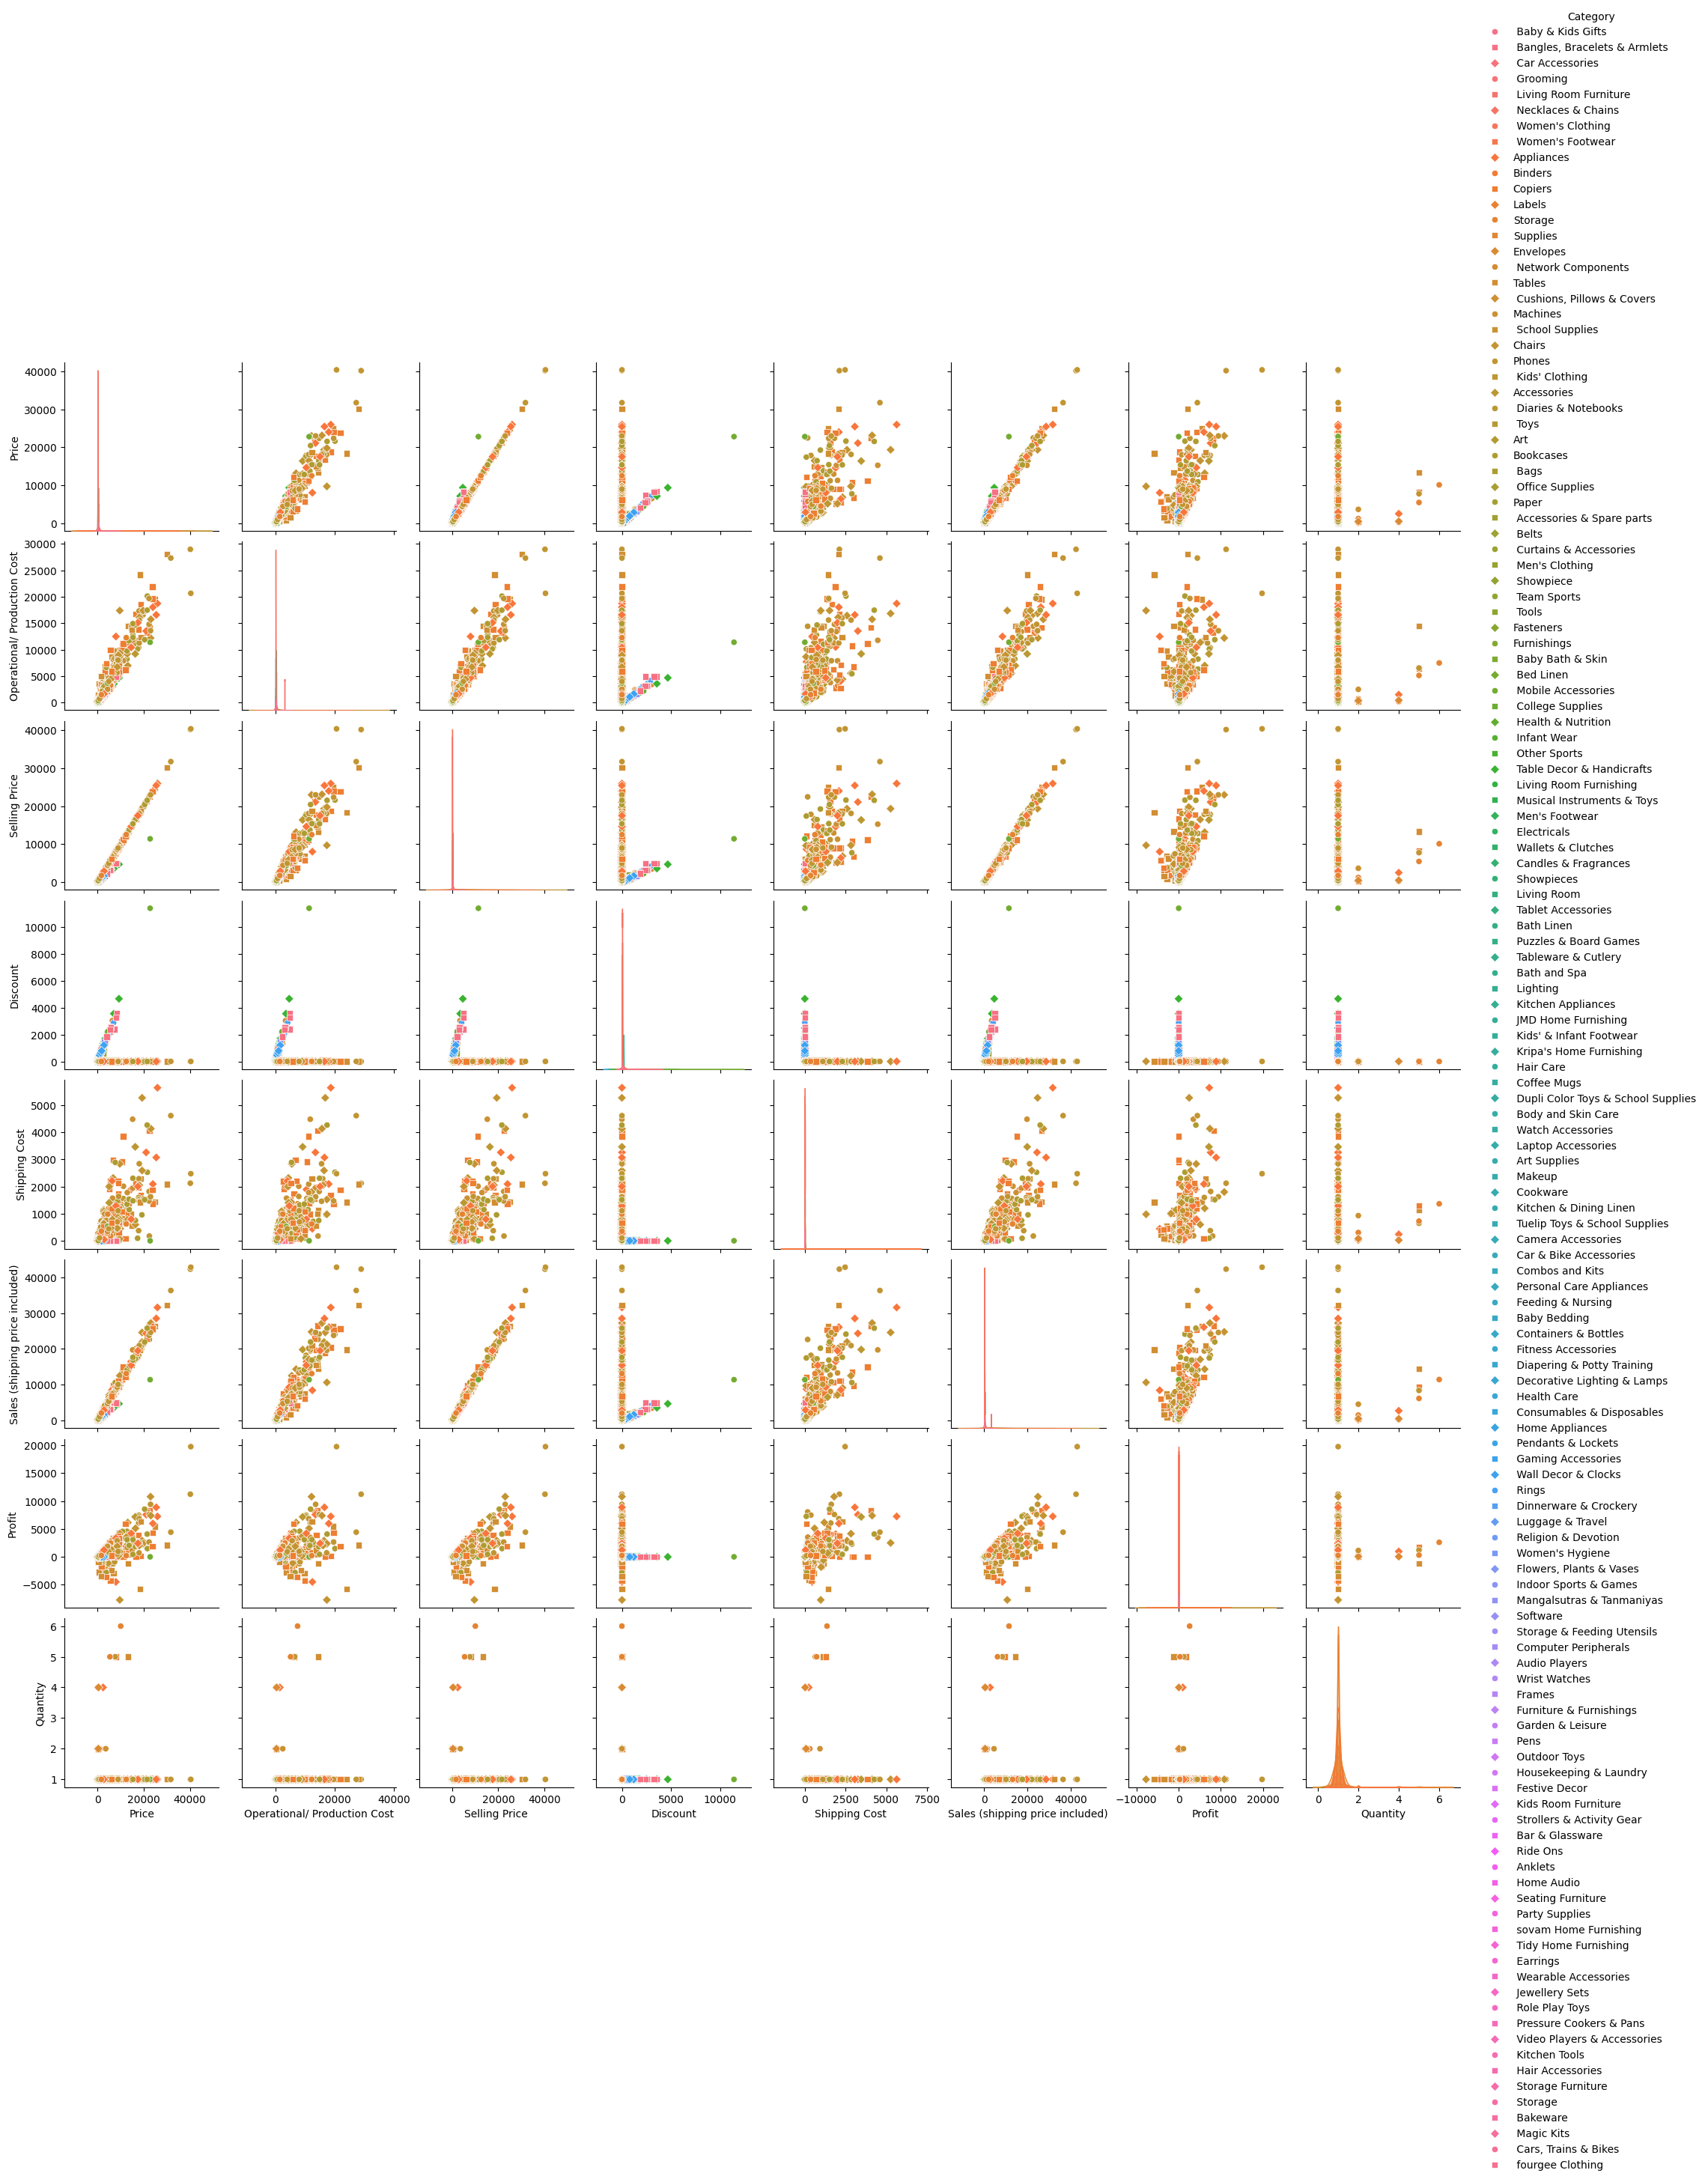

In [14]:
# Enhanced Pair Plot with additional information
sns.pairplot(df, hue='Category', markers=["o", "s", "D"])
plt.show()


# Feature Engineering and Selection

In [19]:
# Drop rows with missing values
df_no_missing = df.dropna()

# Apply PCA on the data without missing values
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_no_missing.select_dtypes(include=np.number))
df_pca = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])

df_pca

PCA1        PCA2
0      -86.931284 -212.340782
1    -1229.575995  -45.783773
2    -1651.066057    6.995397
3    -1230.766837  -43.184672
4    -1791.408556   31.140981
...           ...         ...
5023 -1313.523764  195.934225
5024  -368.143169  -72.788504
5025 -1178.129246  -43.304012
5026  -100.839578   61.043838
5027  1589.029164  -72.899188

[5028 rows x 2 columns]

In [24]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV

# Assuming 'Sales (shipping price included)' is the target variable
X = df.drop(['Sales (shipping price included)'], axis=1)
y = df['Sales (shipping price included)']

# Select numerical features only
X = X.select_dtypes(include=[np.number])

# Impute missing values in X
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Initialize RFECV
estimator = RandomForestRegressor()
selector = RFECV(estimator, step=1, cv=5)
selector = selector.fit(X_imputed, y)

# Get selected features
selected_features = X.columns[selector.support_]


In [25]:
selected_features

Index(['Price', 'Operational/ Production Cost', 'Selling Price',
       'Shipping Cost', 'Profit'],
      dtype='object')

# Outlier Detection and Treatment

In [28]:
# Assuming 'Sales (shipping price included)' is the column of interest
column_of_interest = 'Sales (shipping price included)'

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df[column_of_interest].quantile(0.25)
Q3 = df[column_of_interest].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df[column_of_interest] < lower_bound) | (df[column_of_interest] > upper_bound)]

# Display or handle the outliers as needed
print("Outliers:")
print(outliers)


Outliers:
     Order Date Order Priority          Ship Type          City         State   
0    2015-01-02       Moderate          Named Day         Dhaka         Dhaka  \
10   2015-01-02       Moderate          Named Day     Yingcheng         Hubei   
24   2015-01-02       Moderate          Named Day     Chongqing     Chongqing   
26   2015-01-02       Moderate          Named Day         Dhaka         Dhaka   
28   2015-01-02       Moderate          Named Day     Yingcheng         Hubei   
...         ...            ...                ...           ...           ...   
6419 2018-12-12            Low  Standard Delivery        Zigong       Sichuan   
6421 2018-12-12            Low  Standard Delivery       Huaiyin       Jiangsu   
6424 2018-12-12            Low  Standard Delivery       Huaiyin       Jiangsu   
6426 2018-12-12       Moderate          Named Day        Dalian      Liaoning   
6427 2018-12-12           High           Next Day  Shuangyashan  Heilongjiang   

         Country 

In [31]:
# creating new column to flag found Outhiers 
df['Outlier_Flag'] = np.where(df['Outlier'] == 1, 'Outlier', 'Not Outlier')


# Imputation Techniques

In [33]:
#  missing values are handing by KNN method
numeric_columns = df.select_dtypes(include=[np.number]).columns
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df[numeric_columns]), columns=numeric_columns)

# Advanced Data Cleaning

In [34]:
# Choosing target columns
columns_to_round = ['Price', 'Operational/ Production Cost', 'Selling Price', 'Discount', 'Sales (shipping price included)']

# Round off numbers to 4 decimal places from chosen columns
df[columns_to_round] = df[columns_to_round].round(4)


In [37]:

# Log Transformation for 'Sales (shipping price included)'
df['Log_Sales'] = np.log1p(df['Sales (shipping price included)'])


In [41]:
# Example: A/B Testing for two different strategies
strategy_A = df[df['Price'] == 'A']['Sales (shipping price included)']
strategy_B = df[df['Discount'] == 'B']['Sales (shipping price included)']

t_stat, p_value = stats.ttest_ind(strategy_A, strategy_B)


In [45]:
import scipy.stats as stats

# A/B Testing for two different strategies
strategy_A = df[df['Price'] == 'A']['Sales (shipping price included)']
strategy_B = df[df['Operational/ Production Cost'] == 'B']['Sales (shipping price included)']

t_stat, p_value = stats.ttest_ind(strategy_A, strategy_B)

# Print the results
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

# Interpret the results
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the two strategies.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the two strategies.")


T-statistic: nan
P-value: nan
Fail to reject the null hypothesis: There is no significant difference between the two strategies.


In [44]:
import scipy.stats as stats

# Example: Hypothesis testing for the impact of 'Discount' on 'Sales (shipping price included)'
t_stat, p_value = stats.ttest_rel(df['Discount'], df['Sales (shipping price included)'])

# Print the results
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

# Interpret the results
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant impact of 'Discount' on 'Sales'.")
else:
    print("Fail to reject the null hypothesis: There is no significant impact of 'Discount' on 'Sales'.")


T-statistic: -23.766486422614758
P-value: 9.599704195797861e-120
Reject the null hypothesis: There is a significant impact of 'Discount' on 'Sales'.
